#Importamos librerías

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import random
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib.patches import Patch
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

#Carga del dataset

In [2]:
df = pd.read_csv("./playlist_spotify.csv")

#Visualizacion del dataset

In [3]:
df.head()

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.713,0.514,100125,0.521,0.816000,8,0.1120,-14.835,0,0.0444,119.879,4,0.143
1,0.192,0.714,207019,0.614,0.000000,4,0.2630,-6.935,1,0.0319,123.969,4,0.582
2,0.333,0.630,216200,0.455,0.000004,5,0.1270,-9.290,1,0.0292,139.931,4,0.199
3,0.601,0.810,136413,0.221,0.210000,5,0.1840,-11.005,1,0.0429,109.960,4,0.798
4,0.883,0.465,181440,0.459,0.000173,6,0.0692,-8.137,0,0.0351,90.807,4,0.288


Aca se observa que los valores de **duration** y **tempo** se alejan mucho
del resto, por lo que posteriormente escalaremos los datos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      750 non-null    float64
 1   danceability      750 non-null    float64
 2   duration          750 non-null    int64  
 3   energy            750 non-null    float64
 4   instrumentalness  750 non-null    float64
 5   key               750 non-null    int64  
 6   liveness          750 non-null    float64
 7   loudness          750 non-null    float64
 8   mode              750 non-null    int64  
 9   speechiness       750 non-null    float64
 10  tempo             750 non-null    float64
 11  time_signature    750 non-null    int64  
 12  valence           750 non-null    float64
dtypes: float64(9), int64(4)
memory usage: 76.3 KB


In [5]:
df.describe()

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,0.357394,0.596439,220112.733333,0.594188,0.100245,4.829333,0.203376,-8.509339,0.741333,0.098966,120.405761,3.902667,0.497321
std,0.338405,0.172036,65587.690483,0.253301,0.259921,3.636001,0.177609,5.039488,0.438194,0.104715,28.378116,0.400091,0.239615
min,0.000001,0.107000,33840.000000,0.009250,0.000000,0.000000,0.024000,-29.601000,0.000000,0.023400,55.747000,1.000000,0.033200
25%,0.037150,0.480000,185490.250000,0.423250,0.000000,1.000000,0.094550,-10.173500,0.000000,0.035900,98.998000,4.000000,0.297000
50%,0.244500,0.606000,215108.500000,0.631500,0.000010,5.000000,0.129000,-7.270000,1.000000,0.048750,120.104500,4.000000,0.483000
75%,0.678500,0.715750,244236.750000,0.804750,0.002245,8.000000,0.264750,-5.097750,1.000000,0.113000,138.074750,4.000000,0.684500
max,0.994000,0.986000,675360.000000,0.995000,0.967000,11.000000,0.979000,-0.533000,1.000000,0.721000,204.162000,5.000000,0.975000


Vemos valores estadisticos del Dataset

In [6]:
df.isna().sum()/(df.shape[0]*100) #no tiene valores nulos

,0
acousticness,0.0
danceability,0.0
duration,0.0
energy,0.0
instrumentalness,0.0
key,0.0
liveness,0.0
loudness,0.0
mode,0.0
speechiness,0.0


Como se puede observar no posee valores nulos el Dataset

---



**Matriz de Correlacion**

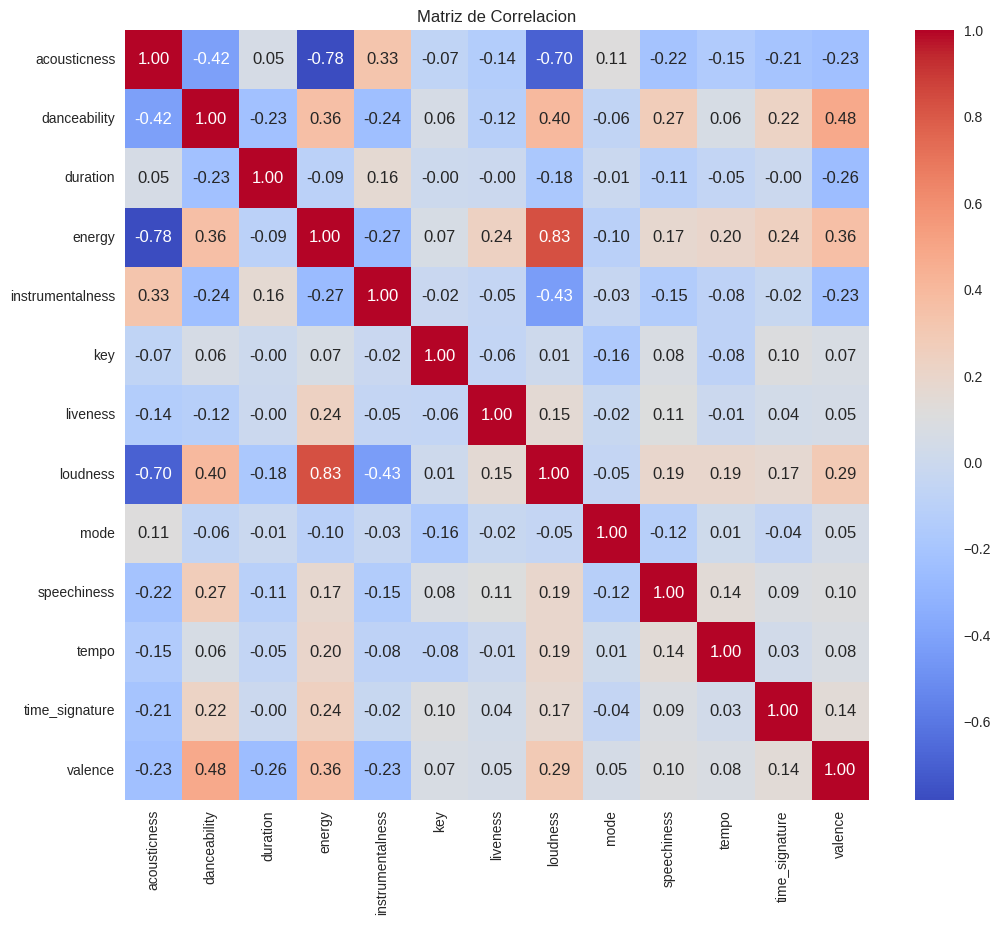

In [7]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlacion')
plt.show()

Se observa una correclacion muy alta (0.83) entre **loudness** y **energy**


---




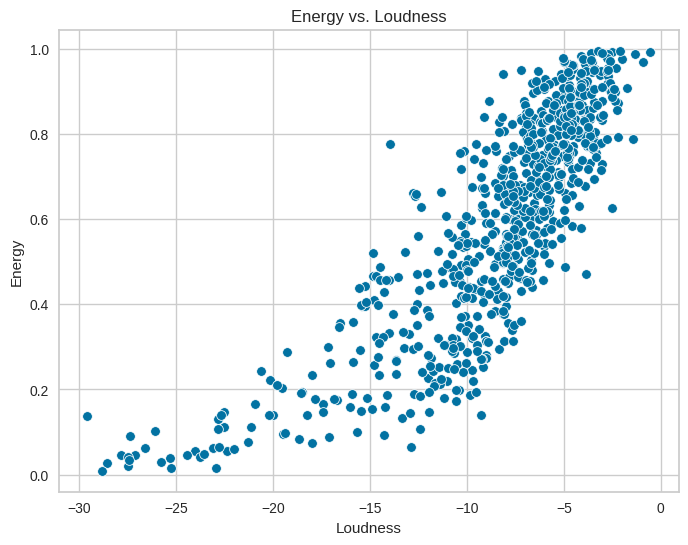

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='loudness', y='energy', data=df)
plt.title('Energy vs. Loudness')
plt.xlabel('Loudness')
plt.ylabel('Energy')
plt.show()


#Selección de variables
>Podemos elegir las caracteristicas para "afinar" el resultado, pero por defecto nos quedaremos con todas las carateristicas para tener un panorama mas amplio.
Sin embargo, se puede considerar que **loudness y energy** tienen una correclacion muy alta **(0.83)** por lo que se podria elegir una sola , por ej: **energy**.


In [9]:
features = [
    'acousticness', 'danceability', 'duration', 'energy',
    'instrumentalness', 'key', 'liveness', 'loudness',
    'mode', 'speechiness', 'tempo', 'time_signature', 'valence'
]

#Transformación de datos

> Se escalara el Dataset ya que como se mostro antes los valores de **duration** y **tempo** se alejan mucho del resto, ya que necesitamos que el Dataset pueda usarse en algoritmos donde se usa las distancias en el espacio Euclideano.En este caso usaremos Robust Scaler.

Inicialmente, al aplicar clustering con **Standard Scaler**, el coeficiente de **Silhouette** fue de **0.2148** (muy bajo), lo que sugería una débil separación entre clústeres. Sin embargo, al utilizar **Robust Scaler** para reducir la influencia de valores atípicos, el coeficiente de **Silhouette** aumentó significativamente a **0.9440** .
Este valor cercano a **1** indica que los grupos están bien definidos y separados entre sí, lo que demuestra que la normalización robusta mejoró considerablemente la calidad del agrupamiento.


In [11]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_scaled = scaler.fit_transform(df)

#Analisis la tendencia al clustering del dataset

Para ello utilizaremos la **Estadística de Hopkins**


> Para determinar si nuestros datos presentan una estructura de agrupamiento o si están distribuidos aleatoriamente, utilizamos la estadística de Hopkins. Si el valor de H se acerca a 0.5, los datos están distribuidos aleatoriamente. Si el valor de H es cercano a 1, indica que los datos tienen una fuerte tendencia a formar grupos.





In [12]:
#se asume que X ya viene escalado
def hopkins(X, sample_size=0.1, random_state=42):
    """
    Calcula el estadístico de Hopkins para estimar la tendencia al clustering.

    Parámetros:
    - X: numpy array o DataFrame con los datos (sin incluir columnas categóricas).
    - sample_size: proporción o cantidad de puntos aleatorios (por defecto 10%).
    - random_state: para reproducibilidad.

    Retorna:
    - Valor entre 0 y 1. Cerca de 1 => tendencia a agruparse. Cerca de 0.5 => aleatorio.
    """

    if isinstance(X, np.ndarray) == False:
        X = np.array(X)

    n, d = X.shape
    m = int(sample_size * n) if isinstance(sample_size, float) else sample_size

    np.random.seed(random_state)

    # Puntos reales aleatorios
    real_samples = X[np.random.choice(n, m, replace=False)]
    # Puntos aleatorios en el espacio de características (uniformemente distribuidos en 0-1)
    random_samples = np.random.uniform(low=np.min(X, axis=0),
                                       high=np.max(X, axis=0),
                                       size=(m, d))

    nn = NearestNeighbors(n_neighbors=2).fit(X)

    distances_real, _ = nn.kneighbors(real_samples)
    distances_random, _ = nn.kneighbors(random_samples)

    W = np.sum(distances_real[:, 1])
    U = np.sum(distances_random[:, 0])

    H = U / (U + W)
    return H


In [13]:
H = hopkins(df_scaled)
print(f"Hopkins: {H:.4f}")

Hopkins: 0.8223


Como se observa, el **índice de Hopkins** dio **0.8223**, lo que indica una **muy buena tendencia** a la formación de clusters en el dataset. Por lo tanto, es apropiado aplicar técnicas de clustering sobre estos datos.

----------------------

#Estimacion de la cantidad apropiada de grupos

Para ello haremos uso de la Regla del codo (**Elbow Method**)

> Para identificar el número óptimo de clusters en nuestros datos, utilizaremos la Regla del Codo. Esta técnica consiste en graficar la suma de los errores cuadráticos dentro de los clusters (SSE) en función del número de clusters y buscar el punto donde la disminución de SSE comienza a estabilizarse, lo que indica el número adecuado de clusters.



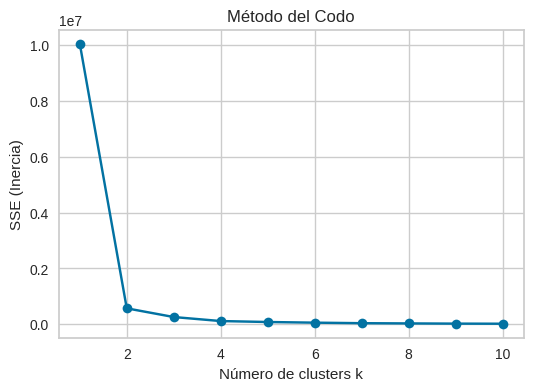

In [14]:
sse = []
ks = range(1, 11)
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(6,4))#(8, 5)
plt.plot(ks, sse, '-o')
plt.xlabel('Número de clusters k')
plt.ylabel('SSE (Inercia)')
plt.title('Método del Codo')
plt.show()

Podemos ver claramente que el codo se forma para **K = 2**

#Evaluacion de la calidad de los grupos

Para evaluar qué tan bien se han formado los grupos utilizaremos el análisis de **Silhouette**.

> Este método nos permite medir la cohesión interna y la separación entre los clusters. Un valor cercano a 1 indica que los puntos están bien agrupados, mientras que valores cercanos a 0 o negativos sugieren que los clusters podrían estar mal definidos.






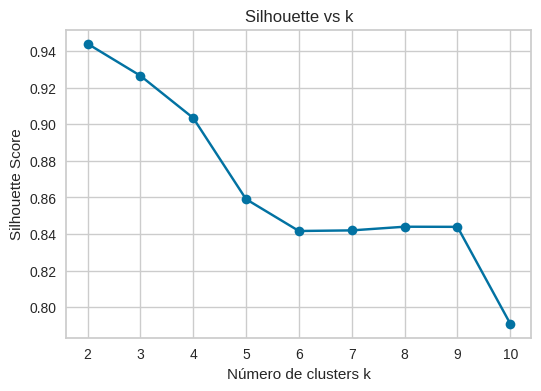


 El número óptimo de clusters es: 2 (score = 0.9440)


In [15]:
silhouette_scores = []
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(6,4))
plt.plot(k_values, silhouette_scores, '-o')
plt.xlabel('Número de clusters k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette vs k')
plt.show()

best_k = k_values[np.argmax(silhouette_scores)]
print(f"\n El número óptimo de clusters es: {best_k} (score = {max(silhouette_scores):.4f})")

Aca observamos que el numero de clusters optimo es **2**

 Ahora se analizara el gráfico generado con **SilhouetteVisualizer**:

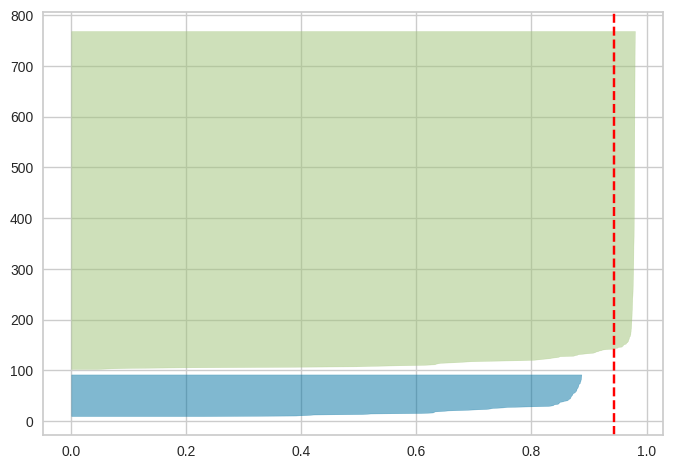

In [16]:
kmeans = KMeans(2, random_state=42, n_init=10)

visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(df_scaled)
plt.show()

In [17]:
labels = kmeans.fit_predict(df_scaled)

# Cálculo del score global y por muestra
global_score = silhouette_score(df_scaled, labels)
sil_vals = silhouette_samples(df_scaled, labels)

# Recojo estadísticas para los k clusters
stats = []
for cluster in range(best_k):
    vals = sil_vals[labels == cluster]
    stats.append({
        'cluster': cluster,
        'count': len(vals),
        'min_silhouette': float(np.min(vals)),
        'max_silhouette': float(np.max(vals)),
        'avg_silhouette': float(np.mean(vals))
    })

stats_df = pd.DataFrame(stats)
print(stats_df.to_string(float_format="%.4f"))
print(f"Silhouette global score: {global_score:.4f}")

   cluster  count  min_silhouette  max_silhouette  avg_silhouette
0        0     83          0.2296          0.8867          0.8081
1        1    667          0.0443          0.9799          0.9609
Silhouette global score: 0.9440


Se observan **dos bandas bien definidas**, correspondientes a los dos clústeres formados con k=2.  
- La **primera banda**, de tamaño pequeño (83 muestras), presenta coeficientes de silhouette entre **0.2296** y **0.8867**, con barras relativamente anchas y uniformes, lo que indica buena cohesión interna.  
- La **segunda banda**, mucho mayor (667 muestras), alcanza valores de hasta **0.9799** y tiene la mayoría de barras muy largas, lo que sugiere un agrupamiento aún más compacto.  
- **No aparecen valores negativos**, lo que confirma que ningún punto estaría más cerca del centro del otro clúster.

La **línea roja punteada** en **0.94398** marca el **silhouette score promedio**, y la mayoría de los valores individuales están por encima de esa línea. Un valor tan cercano a 1 denota una excelente separación y agrupacion: los puntos están claramente agrupados dentro de su clúster y alejados de los demás.

#Representacion Grafica de los Clusters


> se aplico **PCA** para reducir las dimensiones




##3D

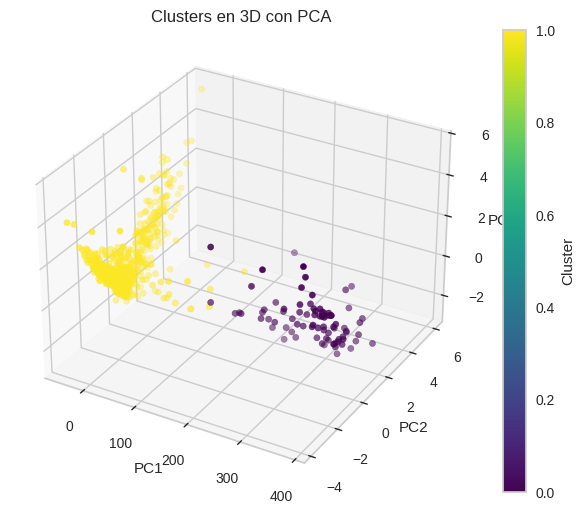

In [37]:
pca = PCA(n_components=3)

X_pca3 = pca.fit_transform(df_scaled)

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca3)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca3[:,0], X_pca3[:,1], X_pca3[:,2], c=clusters, cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('Clusters en 3D con PCA')
plt.colorbar(scatter, label='Cluster')
plt.show()

##2D

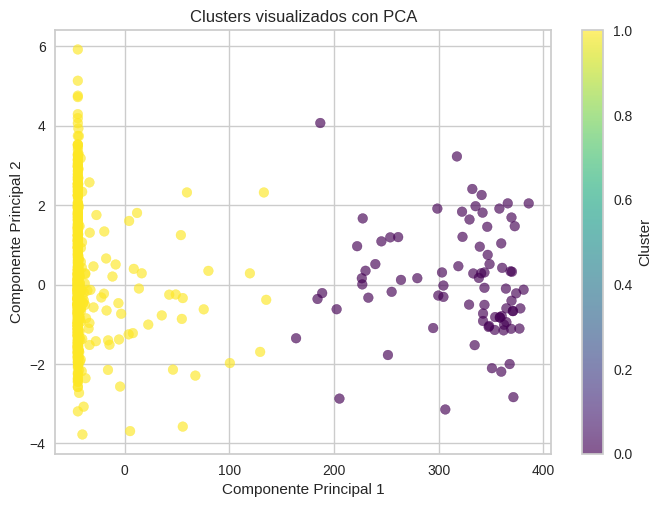

In [38]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis',alpha=0.65)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters visualizados con PCA')
plt.colorbar(label='Cluster')
plt.show()

#Análisis de cluster

> Se analizaran y compararan las medias de cada Clusters y haciendo uso de diferentes graficos se determinara las carateristicas de cada Cluster.



Teniendo en cuenta la **documentacion Spotify**, se muestra la siguiente tabla que muestra el rango de cada caracteristica

| Feature         | Rango             | Notas                                            |
|-----------------|-------------------|--------------------------------------------------|
| acousticness    | 0.0 – 1.0         | 1.0 = completamente acústico                     |
| danceability    | 0.0 – 1.0         | 1.0 = muy bailable                               |
| energy          | 0.0 – 1.0         | 1.0 = muy enérgico (rápido, ruidoso)             |
| instrumentalness| 0.0 – 1.0         | 1.0 = sin voces                                  |
| speechiness     | 0.0 – 1.0         | 1.0 = sólo habla                                 |
| valence         | 0.0 – 1.0         | 1.0 = muy positivo/alegre                        |
| liveness        | 0.0 – 1.0         | 1.0 = muy “en vivo”                              |
| loudness        | –60 dB – 0 dB     | 0 dB = volumen máximo|
| tempo           | ≈ 0 BPM – ~250 BPM| BPM (pulsos por minuto); pistas suelen 60–200 BPM |
| key             | –1 – 11           | –1 = no detectado; 0=C, 1=C♯, …, 11=B             |
| mode            | 0 – 1             | 0 = menor; 1 = mayor                             |
| time_signature  | 3 – 7             | pulsos por compás (ej: 4 = 4/4)                 |


Cantidad de registros por Cluster

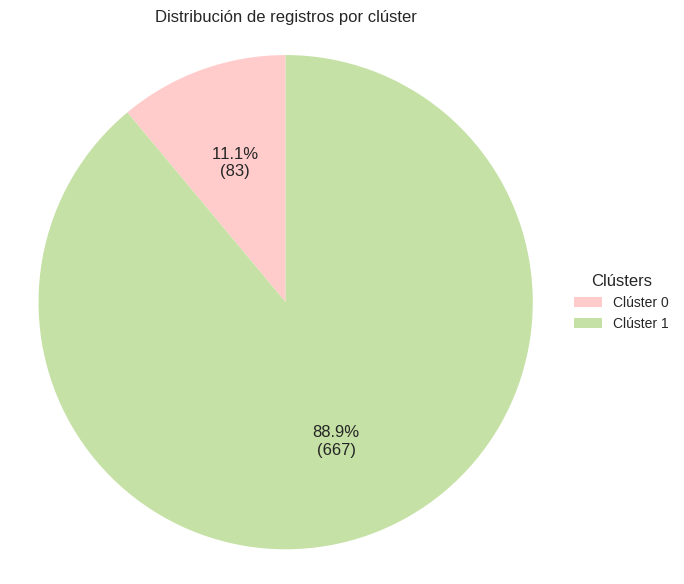

In [22]:
# Obtener etiquetas y contar registros por clúster
labels = kmeans.labels_
counts = pd.Series(labels).value_counts().sort_index()

# Nombres para cada clúster
labels_names = [f'Clúster {i}' for i in counts.index]

colors = ['#ffcccb', '#c5e1a5', '#b3e5fc', '#f8bbd0', '#d1c4e9']

# Función para mostrar porcentaje y cantidad
def make_autopct(counts):
    def my_autopct(pct):
        total = sum(counts)
        absolute = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({absolute})'
    return my_autopct

fig, ax = plt.subplots(figsize=(7, 6))
wedges, texts, autotexts = ax.pie(
    counts,
    labels=None,
    autopct=make_autopct(counts),
    startangle=90,
    colors=colors[:len(counts)]
)

ax.legend(
    wedges,
    labels_names,
    title="Clústers",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.title('Distribución de registros por clúster')
plt.axis('equal')
plt.tight_layout()
plt.show()


Entrenamos el modelo , obtenemos las medias (y sus diferencias) de cada clusters para luego ponerlo en una tabla

In [34]:
# Formato de 4 decimales
pd.set_option('display.float_format', '{:.4f}'.format)

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(df_scaled)

# Media por cluster
cluster_means = df.groupby('cluster')[features].mean().round(4)

# Diferencia absoluta
diff = (cluster_means.loc[0] - cluster_means.loc[1]).abs().round(4)

# DataFrame resumen
summary = cluster_means.T.copy()
summary.columns = ['mean_cluster_0', 'mean_cluster_1']
summary['diff'] = diff.values

# % de diferencia sobre la media conjunta
summary['diff(%)'] = (
    summary['diff']
    / summary[['mean_cluster_0', 'mean_cluster_1']].mean(axis=1).abs()
    * 100
).round(2)

# Identificar cluster dominante
summary['dominant_cluster'] = summary.apply(
    lambda r: 'Cluster 1' if r['mean_cluster_1'] > r['mean_cluster_0'] else 'Cluster 0',
    axis=1
)

# % de diferencia relativo al dominante (dividir por la media menor)
summary['diff_vs_dominant(%)'] = (
    summary['diff']
    / summary[['mean_cluster_0', 'mean_cluster_1']].min(axis=1).abs()
    * 100
).round(1)

print("Medias y diferencias porcentuales entre clusters:")
display(summary[[
    'mean_cluster_0',
    'mean_cluster_1',
    'diff',
    'diff(%)',
    'diff_vs_dominant(%)',
    'dominant_cluster'
]])


Medias y diferencias porcentuales entre clusters:


,mean_cluster_0,mean_cluster_1,diff,diff(%),diff_vs_dominant(%),dominant_cluster
acousticness,0.6547,0.3204,0.3343,68.5700,104.3000,Cluster 0
danceability,0.4901,0.6097,0.1196,21.7500,24.4000,Cluster 1
duration,247768.7229,216671.2834,31097.4395,13.3900,14.4000,Cluster 0
energy,0.4148,0.6165,0.2017,39.1200,48.6000,Cluster 1
instrumentalness,0.8156,0.0112,0.8044,194.5800,7182.1000,Cluster 0
key,4.6627,4.8501,0.1874,3.9400,4.0000,Cluster 1
liveness,0.1781,0.2065,0.0284,14.7700,15.9000,Cluster 1
loudness,-14.1363,-7.8091,6.3272,57.6600,44.8000,Cluster 1
mode,0.6988,0.7466,0.0478,6.6100,6.8000,Cluster 1
speechiness,0.0590,0.1039,0.0449,55.1300,76.1000,Cluster 1


##**(cluster vs cluster)** Comparacion entre Clusters , usando sus **medias**.


Aqui se puede observar la tabla donde:
- **mean_cluster_0** y **mean_cluster_1**	Son las medias de cada Cluster.
- **diff**	y **diff(%)** Son la diferencias entre las medias
-**absoluta** y **sobre la media conjunta porcentual** respectivamente.
-	**dominant_cluster** Es el cluster con mayor valor.
-**diff_vs_dominant** Es la diferencia porcentual entre las medias de los clusters ,pero relativa al dominante(al de mayor valor).

Usamo diff(%)  (diferencias sobre la media conjunta porcentual) para poder hacer un grafico compacto y que mantenga las caracteristicas cualitativas.

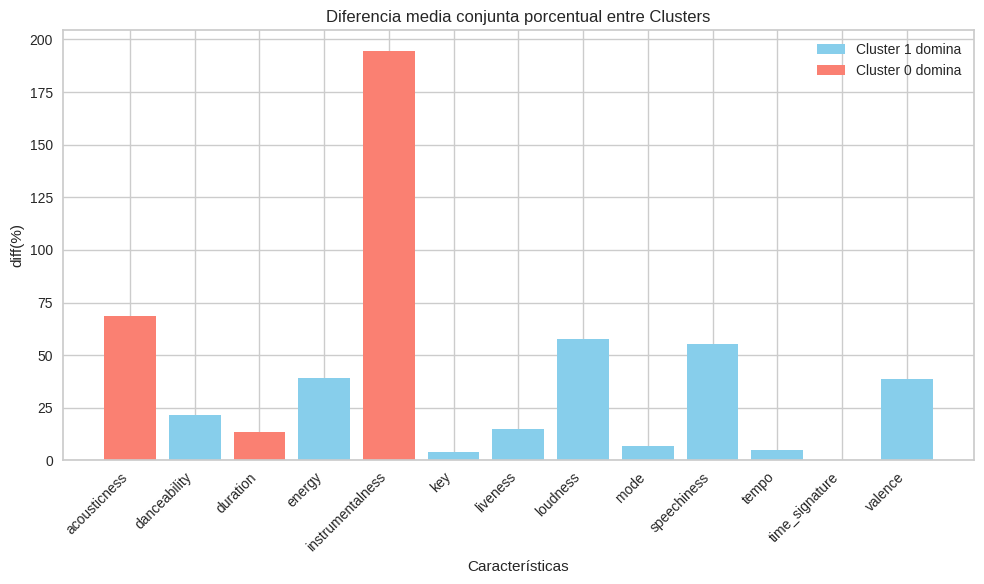

In [39]:
#Gráfico de barras ABSOLUTAS de diff(%), coloreado por cluster dominante

heights = summary['diff(%)']
colors  = summary['dominant_cluster'].map({
    'Cluster 1': 'skyblue',
    'Cluster 0': 'salmon'
})

plt.figure(figsize=(10, 6))
plt.bar(summary.index, heights, color=colors)

legend_elements = [
    Patch(facecolor='skyblue', label='Cluster 1 domina'),
    Patch(facecolor='salmon',  label='Cluster 0 domina')
]
plt.legend(handles=legend_elements)

plt.title('Diferencia media conjunta porcentual entre Clusters')
plt.ylabel('diff(%)')
plt.xlabel('Características')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Podemos apreciar que:
- el **Cluster 1** tiene valores mayores que el **Cluster 0** en casi todas las caracteristicas, salvo ***acousticness*** , ***duration*** y ***instrumentalness*** donde el **Cluster 0** domina con valores superiores.
-***time_signature***  es practicamente igual en los dos Clusters.
-***tempo*** ,***mode*** y ***key*** casi no varian entre Clusters (menor a **7%**).
- el **Cluster 0** destacan en valores de ***energy***, ***danceability***, ***loudness*** , ***speechiness*** , ***valence*** y ***liveness***.

Para hacer mas clara la comparacion de cada caracteristica se tendra en cuenta la diferencia entre Clusters en porcentaje y su valor expresado con 2 decimales, y en el caso particular de *duration* se lo convertira de ms a min.
Se tendra en cuenta los rangos de cada varible para poder tener una interpretacion mas objetiva.

**ACLARACION**:
Cuando decimos, por ejemplo, “pasa de un sonido suave a uno más intenso”, el primer valor corresponde al cluster con el porcentaje menor (punto de partida) y el segundo al cluster destacado en el título (el que muestra el porcentaje mayor). Así, siempre comparamos el valor del cluster “más bajo” frente al del cluster “más alto” para dejar claro cuál supera a cuál.

---
**Cluster 1**:

Tiene valores considerablemente mayores que el **Cluster 0** en:

- ***loudness*** : -7.81 →  Es un **44.8%** mayor lo que indica que es más “potente”, es decir, menor atenuación de volumen (teniendo presente que **dB** es logaritmico y no lineal), pasando de un volumen suave a uno intenso (mas potente).

- ***speechiness*** : 0.10  → Tiene un **76.1%** más de voces cantadas, aunque aun bajo , lejos del umbral **~0.33** que indicaría contenido hablado, esto significa que es musica (no un podcast por ej.) reflejando una mayor presencia de voces cantadas (mas densidad lírica).

- ***energy*** : 0.62  →  Es un **48.6%** más enérgico, pasando de un estilo moderado a uno dinámico y vibrante (mas dinamico).

- ***danceability*** : 0.61  → Es un **24.4%** más bailable,con ritmos más marcados y regulares, pasando de mediano a alto ritmo (mas bailable).

- ***valence*** : 0.52  → Es un **48.3%** más positivo en tono, pasando de tonos melancolicos a alegres o estimulantes.(mas alegre)

-  ***liveness*** : 0.21  → Tiene un **15.9%** mayor sensación de directo, aunque aún moderada , tiene poco ambiente de público (levemente mas en vivo ).


Por el contrario, es menor que el **Cluster 0** en:

- ***instrumentalness***: 0.01  → **−7182.1%** , casi sin partes instrumentales.

- ***acousticness***: 0.32  → **−104.3 %** , mucho menos acústico.

- ***duration***: 3.61 min  → **−14.4 %** , canciones más cortas (0.6 min ≈ 36 segundos).
.

<br>

**-Conclusión para Cluster 1:**

Agrupa canciones con sonido potente, con voces cantadas, energicas y vibrantes, muy ritmicas y bailables, con tonos alegres ,de corta duracion, pueden tener algo de sonido de publico. ideales para bailar, entrenar o ambientar una fiesta.


**Ejemplos de géneros:** Pop , Electronica (Dance/House/Techno), Hip-Hop, Rock Alternativo.

---

**Cluster 0**:

Tiene valores considerablemente mayores que el **Cluster 1** en:

- ***instrumentalness*** : 0.82 → Es un **7182.1%** más instrumental, practicamente sin voces.

- ***acousticness*** : 0.65  → Es un **104.3%** más acústico, fuerte presencia de instrumentos orgánicos (sonido acústico sobresaliente).

- ***duration*** : 4.13 → Es un **14.4%** más largo (0.6 min ≈ 36 segundos).

<br>

**-Conclusión para Cluster 0:**

Agrupa canciones casi totalmente instrumentales y acústicas,sin voces , con gran presencia de instrumentos organicos, de duracion media-larga, con un volumen y energía suave,con un ambiente relajante y calmo ,con tonos tranquilos o melancolicos, siendo en su mayoria canciones de estudio(sin publico) .Ideales para relajarse , concentrarse o estudiar.



**Ejemplos de géneros:** Música clásica, Ambient/New Age, Jazz Suave, Folk Acústico, Musica Cinematográfica instrumental.





---


**Conclusión General**

- El **Cluster 0** agrupa música para escuchar con **calma**, piezas instrumentales o acústicas, ideales para momentos de estudio, relax o lectura.

- El **Cluster 1** agrupa temas diseñados para **moverse y disfrutar**, canciones con voces, ritmos marcados y energía alta, perfectas para bailar, entrenar o animar el ambiente.

##**(cluster vs global)** Comparacion entre Clusters y el dataset , usando **Z-Score**






---



Para poder tener una representacion grafica optima de todas las caracteristicas de cada clusters , se opto por usar **Z-Score** en lugar de la media, de esta forma podremos visualizar mejor las diferencias entre cada cluster, sin que variables como ***duration*** o ***tempo*** dominen el grafico con valores muy altos respecto al resto.

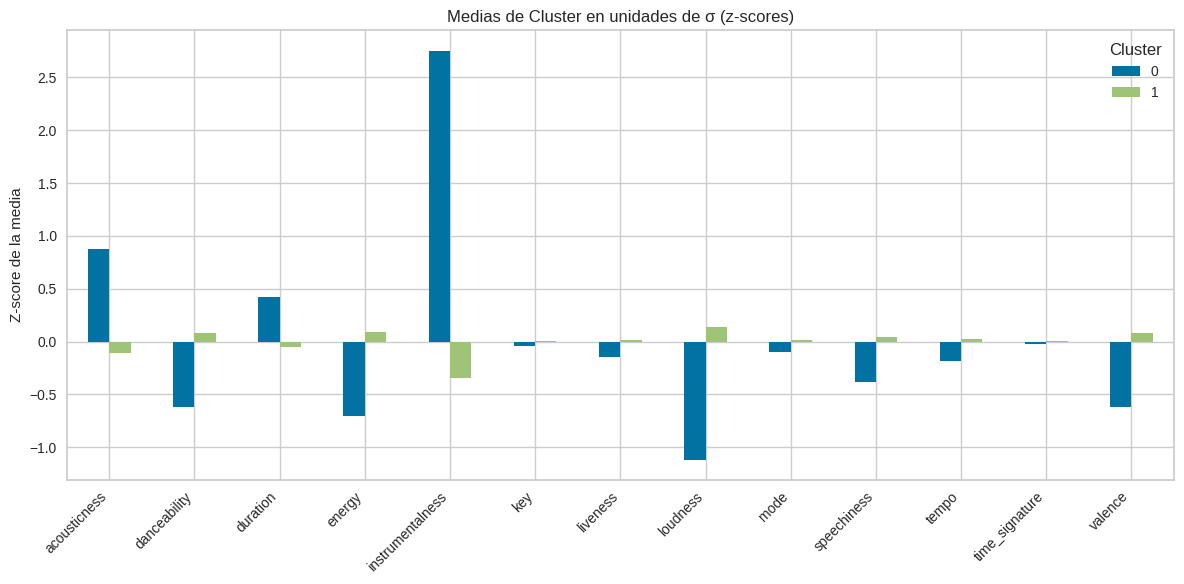

In [35]:
# Calcular medias globales y desviaciones estándar
global_means = df[features].mean()
global_std   = df[features].std()

# Convertir a z-score: z = (mean_cluster - global_mean)/global_std
z_scores_df  = (cluster_means.subtract(global_means, axis=1)
               .divide(  global_std,   axis=1))

fig, ax = plt.subplots(figsize=(12, 6))
z_scores_df .T.plot.bar(ax=ax)
ax.set_ylabel('Z-score de la media')
ax.set_title('Medias de Cluster en unidades de σ (z-scores)')
ax.legend(title='Cluster')
ax.set_xticklabels(z_scores_df .columns, rotation=45, ha='right')
plt.tight_layout()
plt.show()


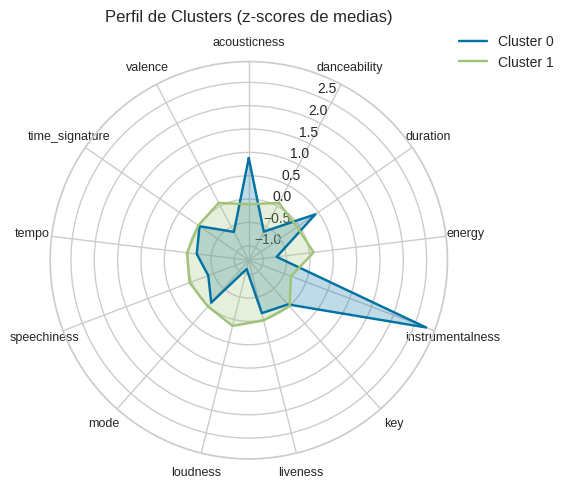

In [36]:
# Cálculo de z-scores: (media_cluster – media_global) / std_global
global_mean = df[features].mean()
global_std  = df[features].std()

# Seleccionas las medias de los clusters
cluster_summary = cluster_means

z_scores_df  = (cluster_summary.subtract(global_mean, axis=1)
               .divide(global_std,   axis=1))

# Preparar datos para radar
labels = features
n = len(labels)
angles = np.linspace(0, 2*np.pi, n, endpoint=False).tolist()
angles += angles[:1]  # cerrar el polígono

# valores de cada cluster (cerrando el bucle)
index_values = z_scores_df .index.tolist()
vals0 = z_scores_df .loc[index_values[0]].tolist() + [z_scores_df .loc[index_values[0]].tolist()[0]]
vals1 = z_scores_df .loc[index_values[1]].tolist() + [z_scores_df .loc[index_values[1]].tolist()[0]]


fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=9)

ax.plot(angles, vals0, linestyle='solid', label='Cluster 0')
ax.fill(angles, vals0, alpha=0.25)
ax.plot(angles, vals1, linestyle='solid', label='Cluster 1')
ax.fill(angles, vals1, alpha=0.25)

ax.set_title('Perfil de Clusters (z-scores de medias)', y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()


Analisis de los Clusters con valores z-scores sobre la media :


**Cluster 0**:
- tiene un valor altisimo  para ***instrumentalness*** (**2.75 σ**) lo que indica que es casi enteramente instrumental.
- tienen valores altos ***acousticness*** (**0.88 σ**) y ***duration*** (**0.42 σ)** lo que indica que además es más acústico y tiene una duracion ligeramente más larga que el resto.

- En cambio, las variables ***energy*** (**−0.71 σ**), ***loudness*** (**−1.12 σ**), ***valence*** (**−0.62 σ**), ***danceability*** (**−0.62 σ**) están muy por debajo de la media. Esto sugiere que las canciones de Cluster 0 son menos enérgicas, con un volumen más bajo, un tono menos “feliz”(mas melancolico) y poco bailables que el resto .

- El resto de variables (***speechiness***, ***liveness***, ***mode***, ***tempo***, etc.) rondan entre **−0.40 σ** y **−0.03 σ**, es decir, ligeramente por debajo del promedio pero sin destacar tanto.

**-Conclusión para Cluster 0:**
Es el grupo de canciones largas, predominantemente instrumentales y acústicos, con bajo volumen y energía, que no están pensados para bailar ni buscan un tono alegre o vocal.

**-Ejemplos de Generos:** Música clásica, instrumental ,Ambient ,New Age ,Jazz suave,Folk, música de cine.

---

**Cluster 1**:
- Destaca por tener valores positivos en casi todas las variables, salvo en ***instrumentalness*** (**-0.34 σ**), ***acousticness*** (**-0.11 σ**) y ***duration*** (**-0.05 σ**),oscilan cerca de **0 σ** (entre **−0.34 σ** y **+0.14 σ**), señalando que contienen menos partes instrumentales y menos elementos acústicos , con una duracion levemente menor.

- Los pocos valores positivos más notables son ***energy*** (**+0.09 σ**) , ***loudness*** (**+0.14 σ**) y ***valence*** (**+0.08 σ**), lo cual indica canciones ligeramente más enérgicas, ligeramente con mas volumen y con un tono más positivo que el promedio.

**-Conclusión para Cluster 1:**
Es un grupo muy cercano al perfil medio del dataset. Sus pistas son fundamentalmente vocales o electrónicas (poco contenido instrumental), de duración estándar, con energía y volumen apenas superiores al promedio y un tinte emocional algo más positivo.

**Ejemplos de Generos:** Pop , electronica (Dance/House/Techno), Hip-hop , Rock alternativo, Indie rock ,Punk.


---



**Conclusión General**
- El **Cluster 0** agrupa música pensada para escuchar con **calma**: piezas instrumentales o acústicas, ideales para momentos de concentración, relax o lectura.

- El **Cluster 1** reúne temas diseñados para **moverse y disfrutar**: canciones con voces, ritmos marcados y energía alta, perfectas para bailar, hacer ejercicio o animar el ambiente.